In [5]:
def generate_subsets_with_center(D, d, verbose=False):
    """Generate the least possible subsets of size d from a list of size D with a center subset so that the list is covered, starting from 0.
    
    Args:
        D (int): The size of the list.
        d (int): The size of the subsets.

    Returns:
        list: A list of subsets of size d.
    
    Example:
        D = 7 -> [0, 1, 2, 3, 4, 5, 6]
        d = 3
        generate_subsets_with_center(D, d) -> [[0, 1, 2], [2, 3, 4], [4, 5, 6]]
    """
    if verbose:
        print(f"D = {D}, d = {d}")

    if D == d: 
        return [list(range(D))]

    Q = (D // 2 - d) // (d - 1)
    R = D - 2 * d - 2 * Q * (d - 1)
    if verbose:
        print(f"Q = {Q}, R = {R}")

    if R < (d - 1):
        C_start = D // 2 - d // 2
        center_subset = list(range(C_start, C_start + d))
    else:
        center_subset = None
        Q += 1
    if verbose:
        print(center_subset)

    L_subsets = [list(range(0, d))]
    R_subsets = [list(range(D - d, D))]
    
    for i in range(Q):
        L_start = d - 1 + i * (d - 1)
        L_subsets.append(list(range(L_start, L_start + d)))
        R_end = D - (d - 1) - i * (d - 1)
        R_subsets.append(list(range(R_end - d, R_end)))
    
    R_subsets.reverse()

    if verbose:
        print(f"L_subsets = {L_subsets}")
        print(f"R_subsets = {R_subsets}")

    if center_subset:
        subsets = L_subsets + [center_subset] + R_subsets
    else:
        subsets = L_subsets + R_subsets

    if verbose:
        print(f"subsets = {subsets}")
    
    return subsets

# Example usage
D = 6
d = 6
subsets = generate_subsets_with_center(D, d, verbose=False)
print(subsets)


[[0, 1, 2, 3, 4, 5]]


# Cols to keep

In [8]:
def get_cols_to_keep(subset, T, D):
    """
    Args: 
        subset (list): A list of indices of the subset 
        T (int): The number of syndrome rounds
        D (int): The distance of the big code
    """
    cols_to_keep = []
    for i in range(T):
        a_cols_to_keep = [x + i * (D-1) for x in subset[:-1]]
        cols_to_keep.extend(a_cols_to_keep)
    c_cols_to_keep = [T * (D-1) + x for x in subset]
    cols_to_keep.extend(c_cols_to_keep)

    return cols_to_keep

D = 7
d = 3
T = 2

subsets = generate_subsets_with_center(D, d)
cols_to_keep = get_cols_to_keep(subsets[0], T, D) 
print(cols_to_keep)

# print IQ array
print(list(range(T*(D-1) + D)))

[0, 1, 6, 7, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


# Layout

In [29]:
link_qubits_ = [1, 3, 5, 7, 9]
code_qubits_ = [0, 2, 4, 6, 8, 10]

subset = subsets[2]
code_qubits = [code_qubits_[i] for i in subset]
link_qubits = [link_qubits_[i] for i in subset[:-1]]


print(f"subset = {subset}")
print(f"code_qubits = {code_qubits}")
print(f"link_qubits = {link_qubits}")

subset = [3, 4, 5]
code_qubits = [6, 8, 10]
link_qubits = [7, 9]


# Analysis plots

In [11]:
# For all distances in steps of 4 from 3 to 51 generate the number of overlapping subsets
D = 1000
for d in range(3, D, 2):
    subsets = generate_subsets_with_center(D, d)
    print(f"d = {d}, number of overlapping subsets = {len(subsets)}")

d = 3, number of overlapping subsets = 500
d = 5, number of overlapping subsets = 250
d = 7, number of overlapping subsets = 167
d = 9, number of overlapping subsets = 125
d = 11, number of overlapping subsets = 100
d = 13, number of overlapping subsets = 84
d = 15, number of overlapping subsets = 72
d = 17, number of overlapping subsets = 63
d = 19, number of overlapping subsets = 56
d = 21, number of overlapping subsets = 50
d = 23, number of overlapping subsets = 46
d = 25, number of overlapping subsets = 42
d = 27, number of overlapping subsets = 39
d = 29, number of overlapping subsets = 36
d = 31, number of overlapping subsets = 34
d = 33, number of overlapping subsets = 32
d = 35, number of overlapping subsets = 30
d = 37, number of overlapping subsets = 28
d = 39, number of overlapping subsets = 27
d = 41, number of overlapping subsets = 25
d = 43, number of overlapping subsets = 24
d = 45, number of overlapping subsets = 23
d = 47, number of overlapping subsets = 22
d = 49, nu

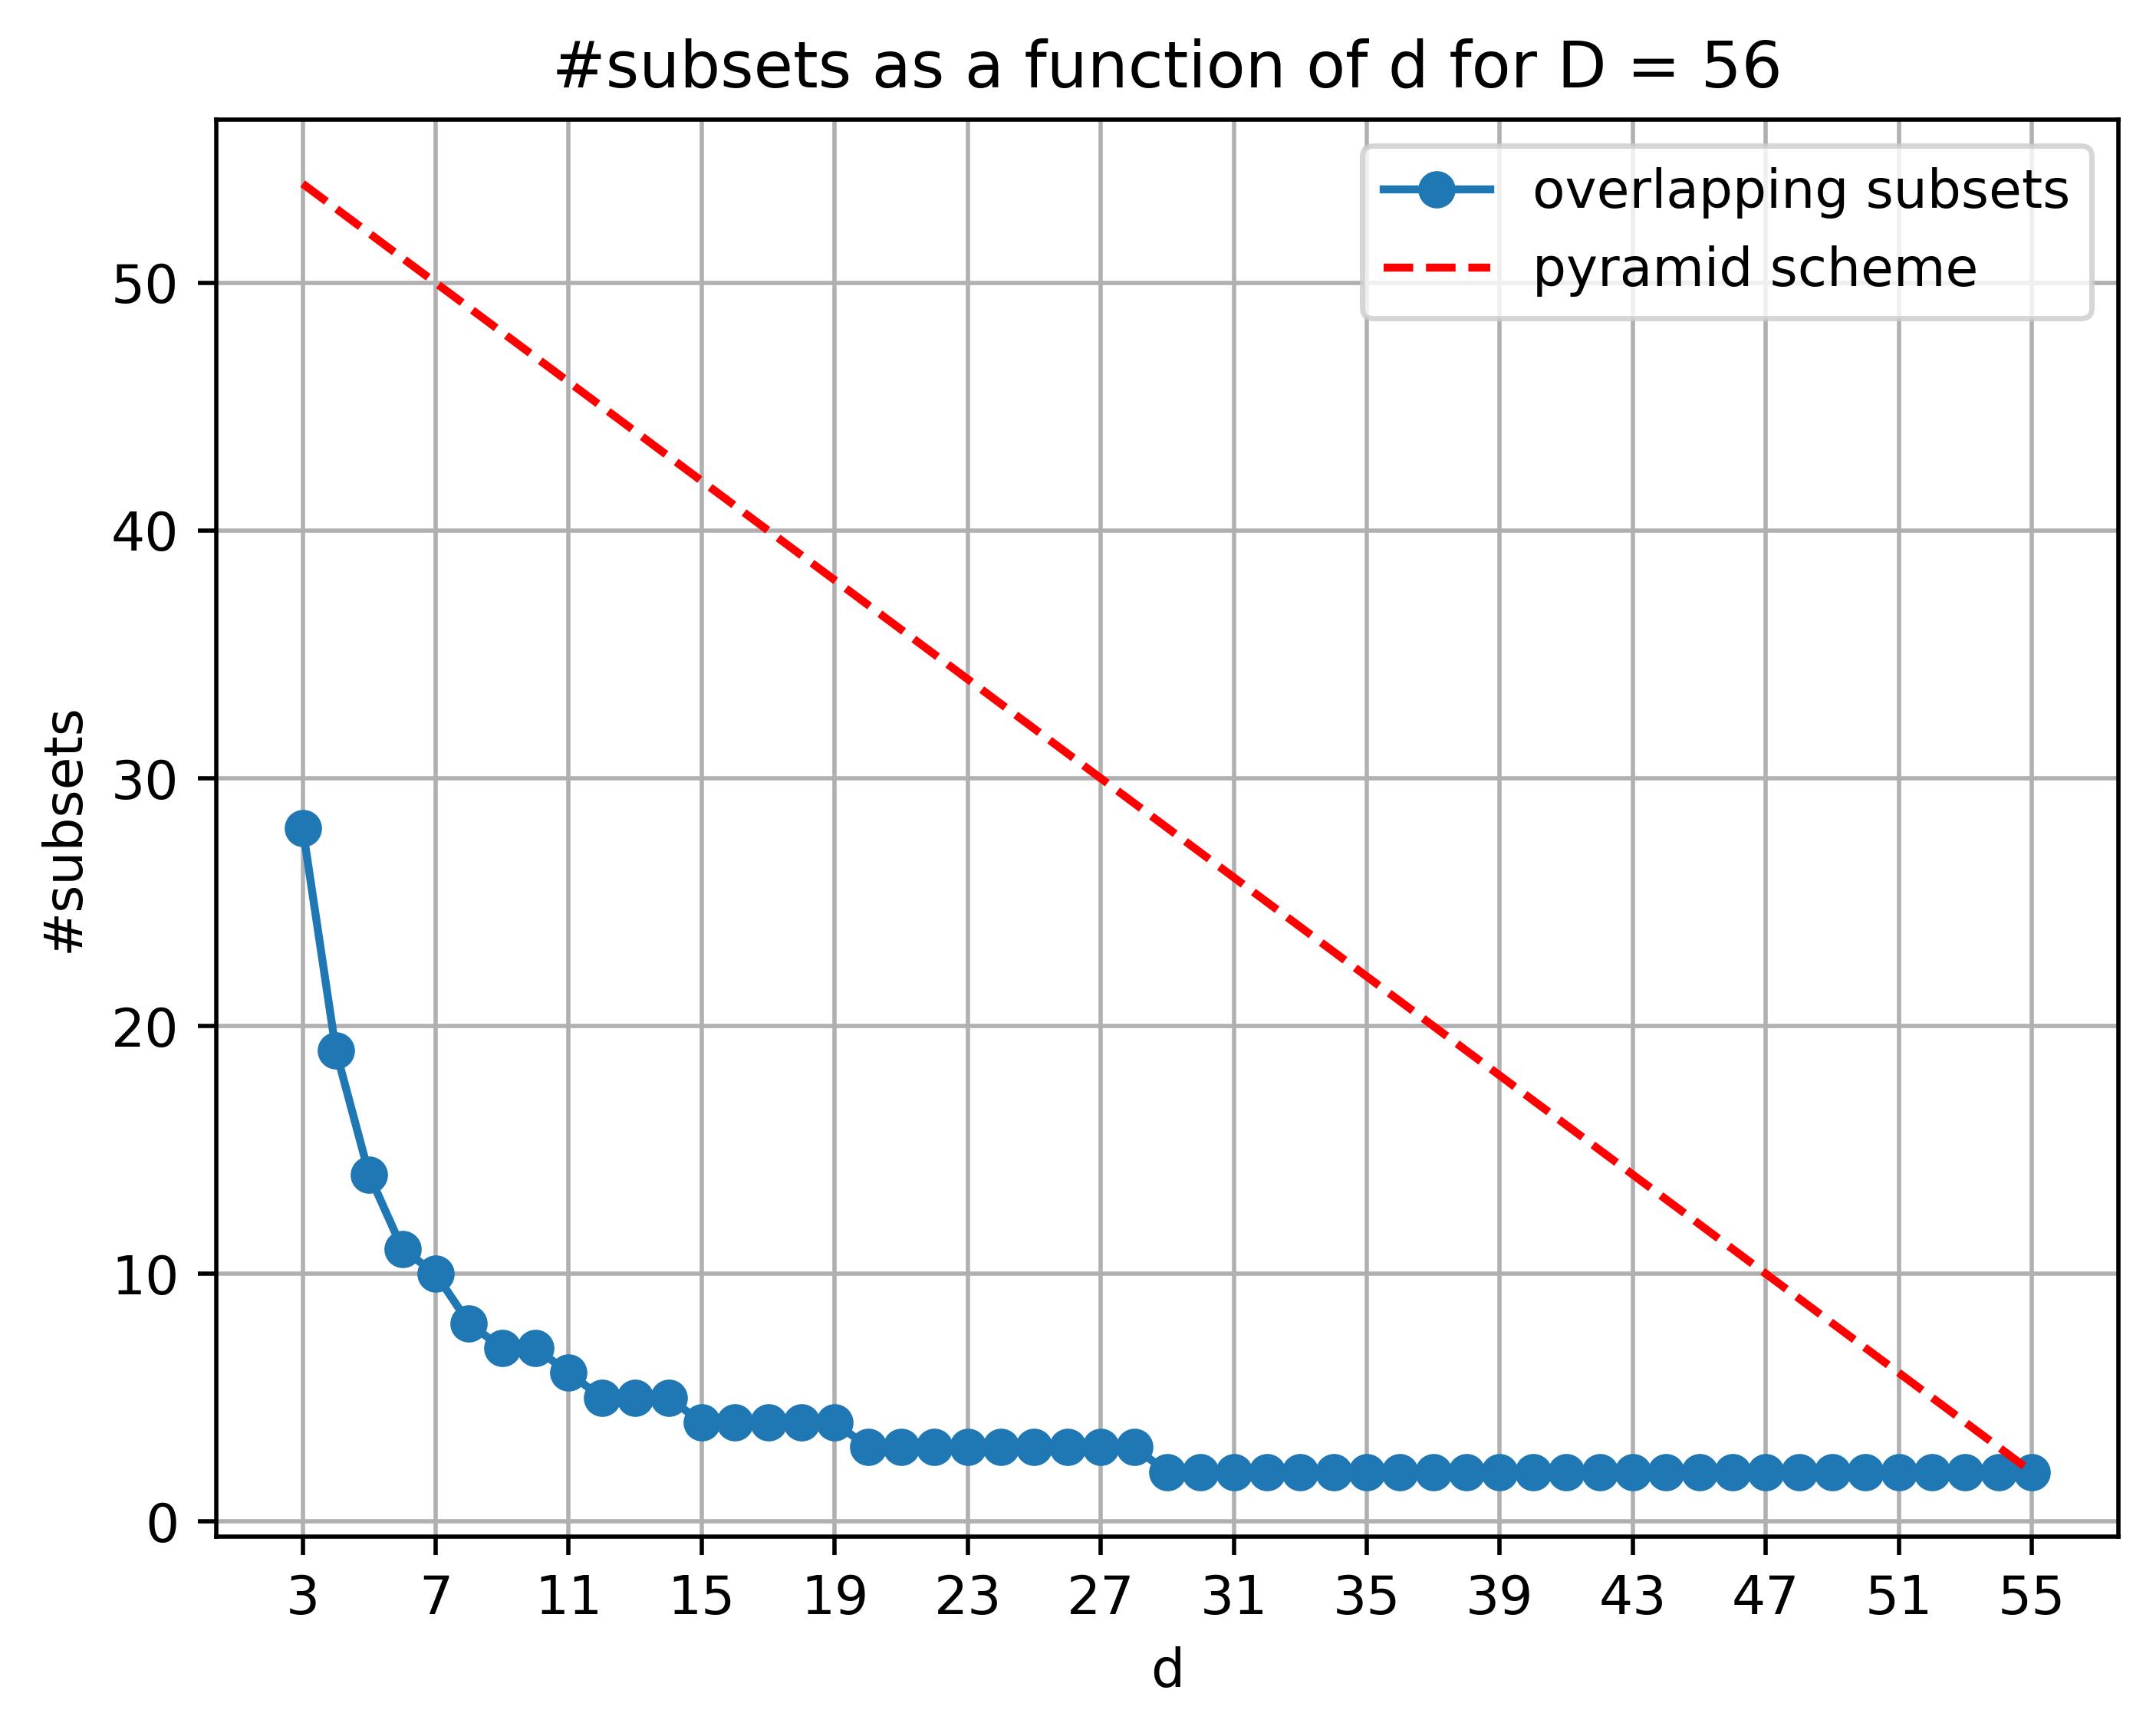

In [16]:
# plot the number of overlapping subsets as a function of d
import matplotlib.pyplot as plt

D = 56
d_values = list(range(3, D, 1))
num_subsets = [len(generate_subsets_with_center(D, d)) for d in d_values]

plt.figure(dpi=500)
plt.plot(d_values, num_subsets, marker='o', label='overlapping subsets')
plt.plot(d_values, [D-d+1 for d in d_values], linestyle='--', color='red', label='pyramid scheme')
plt.xticks(range(3, D, 4))
# plt.yticks(num_subsets[0::2])
plt.xlabel("d")
plt.ylabel("#subsets")
plt.title(f"#subsets as a function of d for D = {D}")
plt.grid()
plt.legend()
plt.show()


# Other

In [9]:
def generate_overlapping_subsets(D, d):
    liste = list(range(D))
    overlapping = False
    left_subsets = []
    right_subsets = []
    while not overlapping:
        try:
            left_subset = list(range(liste[0], liste[0] + d))
            if left_subset in right_subsets:
                overlapping = True
                break
            left_subsets.append(left_subset)
        except IndexError:
            overlapping = True
            break
        try:
            right_subset = list(range(liste[-d], liste[-d] + d))
            if right_subset == left_subset:
                overlapping = True
                break
            right_subsets.append(right_subset)
        except IndexError:
            overlapping = True
            break
        liste = liste[d - 1:-d + 1]
    left_subsets.extend(reversed(right_subsets))

    return left_subsets

# Example usage
D = int(1e4)
d = 11
subsets = generate_overlapping_subsets(D, d)
print(subsets)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130], [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160], [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170], [170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180], [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], [190, 191, 192, 193, 194, 195, 196,

In [10]:
print(f"D = {D}, d = {d}")

# Get Q and R
Q = (D//2 - d) // (d - 1)
R = D - 2*d - 2*Q*(d-1)
print(f"Q = {Q}, R = {R}")

# find the center subset
if R < (d-1):
    C_start = D//2 - d//2 # Not biased towards the right or left
    center_subset = list(range(C_start, C_start + d))
else:
    center_subset = None
    Q += 1
print(center_subset)

# Get the subsets
L_subsets = [list(range(0, d))] # first L subset
R_subsets = [list(range(D - d, D))] # first R subset
for i in range(Q):
    L_start = d-1 + i*(d-1)       
    L_subsets.append(list(range(L_start, L_start + d)))
    R_end = D - (d-1) - i*(d-1)
    R_subsets.append(list(range(R_end-d, R_end))
)
R_subsets = R_subsets[::-1] # reverse the R subsets
print(f"L_subsets = {L_subsets}")
print(f"R_subsets = {R_subsets}")

# Combine the subsets
if R < (d-1):
    subsets = L_subsets + [center_subset] + R_subsets
else:
    subsets = L_subsets + R_subsets
print(f"subsets = {subsets}")

# Check if negative values are present
for subset in subsets:
    if any(x < 0 for x in subset):
        raise ValueError("Negative values are present in the subsets")


D = 10000, d = 11
Q = 498, R = 18
None
L_subsets = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130], [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160], [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170], [170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180], [180, 181, 182, 183, 184, 185, 186, 187, 